In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
LABELS_PATH = '../../data/intermediate/images/training_labels.csv'

In [3]:
df = pd.read_csv(LABELS_PATH)

In [4]:
labels = [c for c in df.columns if c != 'Name']

In [5]:
df.head()

Name  Amusement park  Animals  Bench  Building  Castle   Cave  \
0  625433.jpg           False    False  False     False   False  False   
1  626248.jpg           False    False  False     False   False  False   
2  626250.jpg           False    False  False      True   False  False   
3  626255.jpg           False    False  False     False   False  False   
4  626273.jpg           False    False  False      True   False  False   

   Church   City  Cross  Cultural institution   Food  Footpath  Forest  \
0   False  False  False                 False  False     False    True   
1   False  False  False                 False  False     False   False   
2   False  False  False                 False  False     False   False   
3   False  False  False                 False  False     False   False   
4   False  False  False                 False  False     False   False   

   Furniture  Grass  Graveyard   Lake  Landscape   Mine  Monument  \
0      False   True      False  False      False  False     False   
1       True  False      False  False      False  False     False   
2       True  False      False  False      False  False     False   
3      False  False      False  False      False  False     False   
4      False  False      False  False      False  False     False   

   Motor vehicle  Mountains  Museum  Open-air museum   Park  Person  Plants  \
0          False      False   False            False  False    True   False   
1          False      False   False            False  False   False   False   
2          False      False   False            False  False   False    True   
3          False       True   False            False  False   False   False   
4          False      False   False            False  False   False   False   

   Reservoir  River   Road  Rocks   Snow  Sport  Sports facility  Stairs  \
0       True  False  False  False  False   True             True   False   
1      False  False  False  False  False  False            False   False   
2      False  False  False  False  False  False            False   False   
3      False  False  False  False  False  False            False   False   
4      False  False  False  False  False  False            False   False   

   Trees  Watercraft  Windows  
0   True       False    False  
1  False       False     True  
2  False       False    False  
3  False       False    False  
4  False       False    False

In [6]:
df.shape

(4125, 39)

In [7]:
labels_cooccurance = np.empty((len(labels), len(labels)), dtype=int)
for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        labels_cooccurance[i][j] = df.apply(lambda row: row[label1] and row[label2], axis=1).sum()

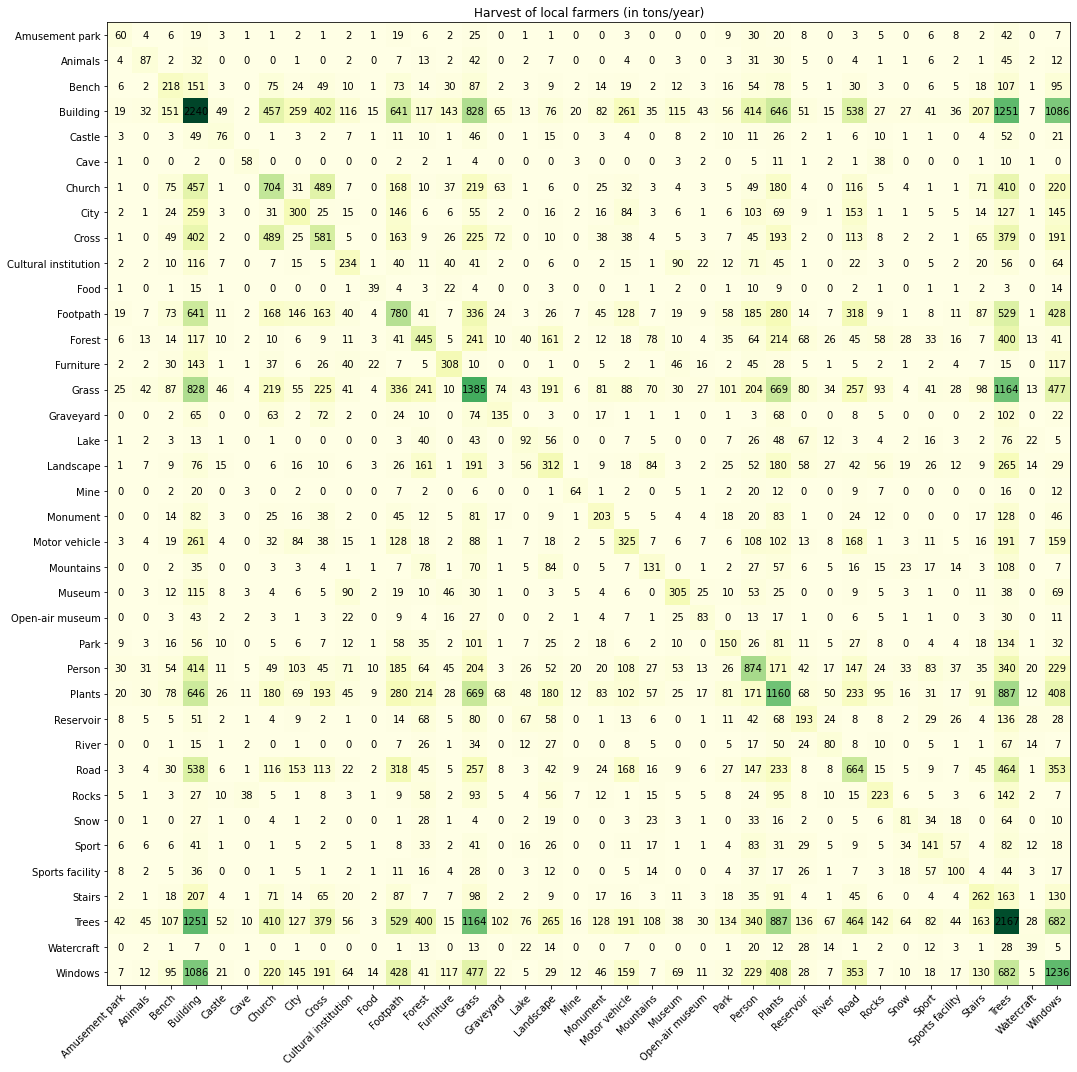

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(labels_cooccurance, cmap="YlGn")

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, labels_cooccurance[i, j],
                       ha="center", va="center", color="k")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.savefig('../../data/plots/labels_cooccurrence.png')
plt.show()

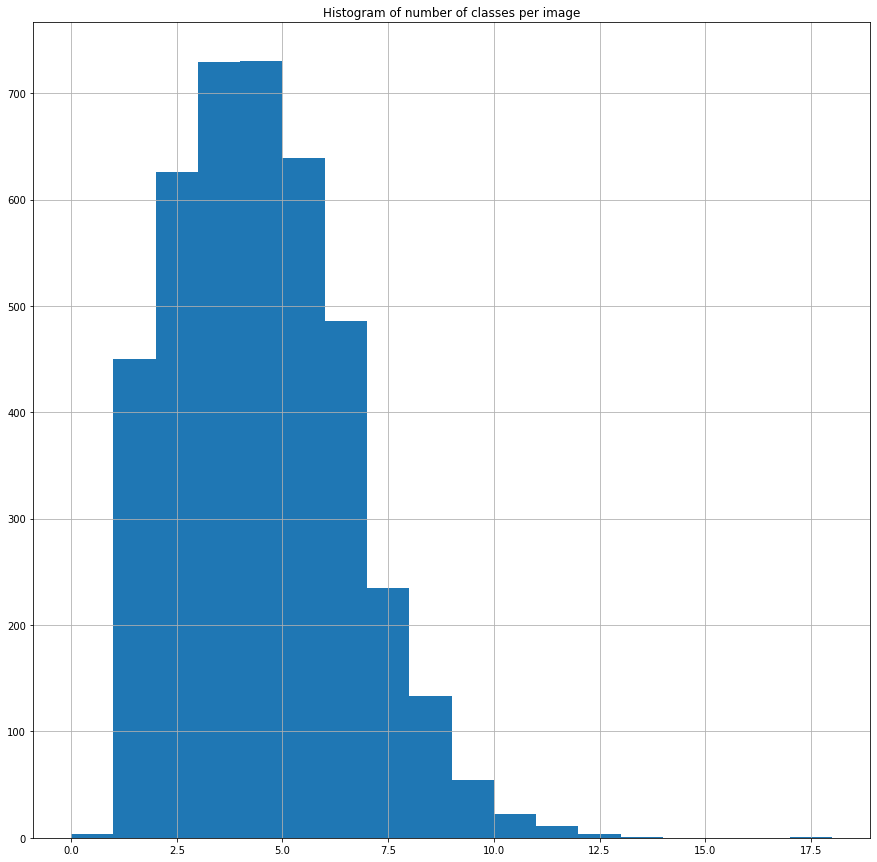

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
df.sum(1).hist(bins=df.sum(1).max(), ax=ax, log=False)
ax.set_title("Histogram of number of classes per image")
plt.savefig('../../data/plots/labels_per_image_hist.png')
plt.show()